   K  Silhouette Score  Davies-Bouldin Index  Dunn Index
0  2          0.227650              1.865467         0.0
1  3          0.257812              1.685846         0.0
2  4          0.251987              1.556531         0.0
3  5          0.276269              1.304397         0.0
4  6          0.284164              1.314676         0.0
5  7          0.278218              1.206732         0.0
6  8          0.283106              1.136836         0.0


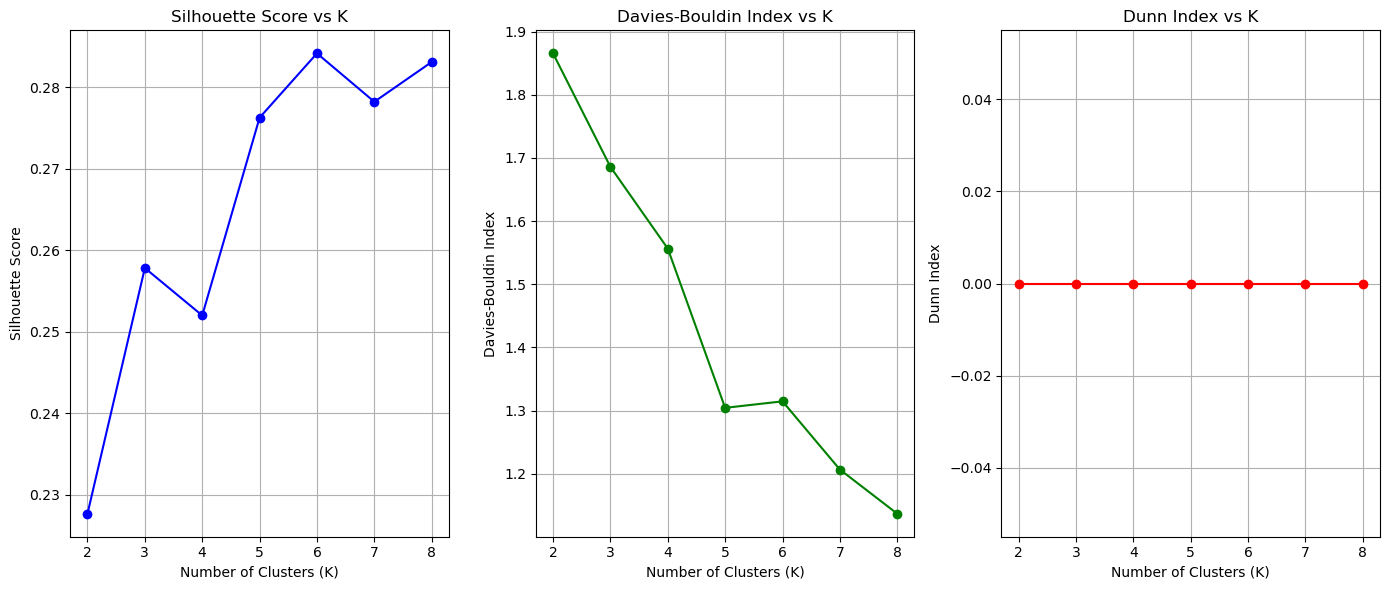

In [2]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset (ensure column headers are as expected)
data = pd.read_csv(r"E:\UoB\Semester 1\DAPM\Assignments\Assignment 2\CSV Files Step by Step\Step 3 Clustering.csv")

# Select numeric columns for clustering
numeric_data = data[['Age', 'Height', 'Weight', 'family_history', 'Meals', 'Smoker', 'Alcohol']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

# Function to calculate Dunn Index
def dunn_index(data_scaled, labels):
    unique_clusters = np.unique(labels)
    inter_cluster_distances = []
    intra_cluster_distances = []
    
    # Calculate inter-cluster distances (minimum distance between clusters)
    for i in unique_clusters:
        for j in unique_clusters:
            if i < j:
                cluster_i = data_scaled[labels == i]
                cluster_j = data_scaled[labels == j]
                min_distance = np.min(pdist(np.vstack([cluster_i, cluster_j]), 'euclidean'))
                inter_cluster_distances.append(min_distance)
    
    # Calculate intra-cluster distances (maximum distance within a cluster)
    for cluster in unique_clusters:
        cluster_data = data_scaled[labels == cluster]
        max_distance = np.max(pdist(cluster_data, 'euclidean'))
        intra_cluster_distances.append(max_distance)
    
    dunn = min(inter_cluster_distances) / max(intra_cluster_distances)
    return dunn

# Iterate through K values and calculate evaluation metrics
k_values = range(2, 9)  # K=2 to K=8
silhouette_scores = []
db_indices = []
dunn_indices = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    
    # Calculate metrics
    silhouette_avg = silhouette_score(data_scaled, labels)
    db_index = davies_bouldin_score(data_scaled, labels)
    dunn_value = dunn_index(data_scaled, labels)
    
    # Append results
    silhouette_scores.append(silhouette_avg)
    db_indices.append(db_index)
    dunn_indices.append(dunn_value)

# Display results
metrics_df = pd.DataFrame({
    'K': k_values,
    'Silhouette Score': silhouette_scores,
    'Davies-Bouldin Index': db_indices,
    'Dunn Index': dunn_indices
})

print(metrics_df)

# Plot metrics
plt.figure(figsize=(14, 6))

# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='blue', label='Silhouette Score')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Davies-Bouldin Index
plt.subplot(1, 3, 2)
plt.plot(k_values, db_indices, marker='o', linestyle='-', color='green', label='Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)

# Dunn Index
plt.subplot(1, 3, 3)
plt.plot(k_values, dunn_indices, marker='o', linestyle='-', color='red', label='Dunn Index')
plt.title('Dunn Index vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Dunn Index')
plt.grid(True)

plt.tight_layout()
plt.show()
